In [58]:
import pandas as pd 
import numpy as np 
from datetime import datetime
import math, statistics 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [65]:
from sklearn.impute import KNNImputer 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

#### Brief checks on dataset 

In [42]:
flight_data = pd.read_csv('participants_dataset_DES.csv')

In [43]:
flight_data.head()

,AIRPLANE_ID,YEAR,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,608900,2020.0,1.0,4,0,0800-0859,NaN,3.0,22.0,NaN,...,11.0,Minneapolis-St Paul International,33.291,-75.177,McCarran International,NaN,NaN,0.0,NaN,NaN
1,211610,2020.0,1.0,4,0,0600-0659,5.0,3.0,25.0,76.0,...,2.0,Dallas Fort Worth Regional,34.163,-71.006,Orlando International,0.00,NaN,0.0,57.0,4.93
2,566705,NaN,1.0,4,0,1200-1259,3.0,NaN,19.0,174.0,...,11.0,Norfolk International,29.534,-81.622,Chicago Midway International,NaN,0.0,0.0,77.0,7.58
3,338088,2020.0,NaN,3,1,1000-1059,7.0,NaN,NaN,143.0,...,6.0,Dallas Fort Worth Regional,38.836,-91.015,Syracuse Hancock International,0.00,0.0,1.2,39.0,6.98
4,216070,2020.0,1.0,3,1,2200-2259,NaN,NaN,28.0,49.0,...,NaN,Newark Liberty International,36.090,-95.852,Los Angeles International,0.34,0.4,NaN,35.0,13.79


In [44]:
flight_data.shape

(200000, 28)

In [45]:
flight_data.head()

,AIRPLANE_ID,YEAR,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,...,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,608900,2020.0,1.0,4,0,0800-0859,NaN,3.0,22.0,NaN,...,11.0,Minneapolis-St Paul International,33.291,-75.177,McCarran International,NaN,NaN,0.0,NaN,NaN
1,211610,2020.0,1.0,4,0,0600-0659,5.0,3.0,25.0,76.0,...,2.0,Dallas Fort Worth Regional,34.163,-71.006,Orlando International,0.00,NaN,0.0,57.0,4.93
2,566705,NaN,1.0,4,0,1200-1259,3.0,NaN,19.0,174.0,...,11.0,Norfolk International,29.534,-81.622,Chicago Midway International,NaN,0.0,0.0,77.0,7.58
3,338088,2020.0,NaN,3,1,1000-1059,7.0,NaN,NaN,143.0,...,6.0,Dallas Fort Worth Regional,38.836,-91.015,Syracuse Hancock International,0.00,0.0,1.2,39.0,6.98
4,216070,2020.0,1.0,3,1,2200-2259,NaN,NaN,28.0,49.0,...,NaN,Newark Liberty International,36.090,-95.852,Los Angeles International,0.34,0.4,NaN,35.0,13.79


In [46]:
flight_data_clean = flight_data.dropna(how='any').reset_index(drop=True)

In [47]:
flight_data_clean.shape

(2926, 28)

In [48]:
flight_data_clean['DAY_OF_WEEK'].unique(), flight_data['DAY_OF_WEEK'].unique()

(array([6, 4, 3, 2, 1, 5, 7]), array([4, 3, 2, 6, 1, 7, 5]))

In [49]:
flight_data_clean['MONTH'].unique(), flight_data['MONTH'].unique()

(array([1.]), array([ 1., nan]))

In [50]:
flight_data_clean['YEAR'].unique(), flight_data['YEAR'].unique()

(array([2020.]), array([2020.,   nan]))

In [51]:
flight_data_clean['DEP_TIME_BLK'].unique()

array(['1200-1259', '0800-0859', '1100-1159', '1900-1959', '1000-1059',
       '1700-1759', '0700-0759', '2000-2059', '1400-1459', '0900-0959',
       '1800-1859', '1500-1559', '0600-0659', '1600-1659', '1300-1359',
       '2100-2159', '2200-2259', '0001-0559', '2300-2359'], dtype=object)

In [52]:
flight_data_clean['DEPARTING_AIRPORT'].unique()

array(['Houston Intercontinental', 'Lambert-St. Louis International',
       'Logan International', "Chicago O'Hare International",
       'Indianapolis Muni/Weir Cook', 'Austin - Bergstrom International',
       'Dallas Fort Worth Regional', 'Miami International',
       'Stapleton International', 'Douglas Municipal',
       'Seattle International', 'Philadelphia International',
       'Los Angeles International',
       'Louis Armstrong New Orleans International',
       'Honolulu International', 'Southwest Florida International',
       'Atlanta Municipal', 'Detroit Metro Wayne County',
       'Kansas City International', 'Minneapolis-St Paul International',
       'Kent County', 'Ronald Reagan Washington National',
       'San Diego International Lindbergh Fl',
       'Newark Liberty International', 'Tampa International',
       'John F. Kennedy International', 'McGhee Tyson',
       'Fort Lauderdale-Hollywood International',
       'San Francisco International', 'Friendship Intern

In [53]:
flight_data_clean.dtypes

AIRPLANE_ID                        int64
YEAR                             float64
MONTH                            float64
DAY_OF_WEEK                        int64
DEP_DEL15                          int64
DEP_TIME_BLK                      object
DISTANCE_GROUP                   float64
SEGMENT_NUMBER                   float64
CONCURRENT_FLIGHTS               float64
NUMBER_OF_SEATS                  float64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH            float64
AIRLINE_FLIGHTS_MONTH            float64
AIRLINE_AIRPORT_FLIGHTS_MONTH    float64
AVG_MONTHLY_PASS_AIRPORT         float64
AVG_MONTHLY_PASS_AIRLINE         float64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                        float64
DEPARTING_AIRPORT                 object
LATITUDE                         float64
LONGITUDE                        float64
PREVIOUS_AIRPORT                  object
PRCP                             float64
SNOW            

#### Final data-checking 

In [70]:
def calc_wind_chill(tmax, awnd):
    w_chill = 35.74 + 0.6215**tmax - 35.75 * awnd ** 0.16 + 0.4275 * tmax * awnd ** 0.16 
    
    return w_chill  

In [71]:
def cal_date(day_of_week, month, year):
    if (pd.isna(day_of_week) is False) & (pd.isna(month) is False) & (pd.isna(year) is False):
        day_of_week, month, year = str(day_of_week), str(int(month)), str(int(year))
        return '0' + day_of_week + '/' + '0' + month + '/' + year[-2:]
    else:
        return np.nan

In [72]:
def cal_timestamp(dt, low):
    if (pd.isna(dt) is False) & (pd.isna(low) is False):
        day, month, year, hh, mm = int(dt.split('/')[0]), int(dt.split('/')[1]), int('20' + dt.split('/')[2]), int(low[:2]), int(low[2:]) 
        return datetime.strftime(pd.Timestamp(day=day, month=month, year=year, hour=hh, minute=mm, second=0), '%d/%m/%y %H:%M')
    else:
        return np.nan 

In [73]:
def prepare_concurrent_flights_df(df):
    airports = df.DEPARTING_AIRPORT.unique()
    weekdays = [sorted(df.DAY_OF_WEEK.unique())]*len(airports)
    time_blk = [sorted(df.DEP_TIME_BLK.unique())] * len(airports)
    con_flights = pd.DataFrame({'DEPARTING_AIRPORT': airports, 'DAY_OF_WEEK': weekdays, 'DEP_TIME_BLK': time_blk}).explode(['DAY_OF_WEEK']).explode(['DEP_TIME_BLK'])
    con_dw_flights = df.groupby(['DEPARTING_AIRPORT', 'DAY_OF_WEEK', 'DEP_TIME_BLK'])['CONCURRENT_FLIGHTS'].median().reset_index()
    concurrent_df = pd.merge(con_flights, con_dw_flights, on=['DEPARTING_AIRPORT', 'DAY_OF_WEEK', 'DEP_TIME_BLK'], how='left')
    
    ret_df = concurrent_df.pivot_table(index=['DEPARTING_AIRPORT', 'DAY_OF_WEEK'], columns='DEP_TIME_BLK', values='CONCURRENT_FLIGHTS', dropna=False, fill_value=0)
    
    return ret_df

In [74]:
def identify_missing_data(flight_data_clean):
    flight_data_clean['YEAR'].fillna(2020, inplace=True)
    flight_data_clean['MONTH'].fillna(1, inplace=True)

    avg_seats_per_airport_per_block = flight_data_clean.groupby(['DEPARTING_AIRPORT', 'DEP_TIME_BLK'])['NUMBER_OF_SEATS'].median().reset_index().pivot_table(index='DEPARTING_AIRPORT', columns='DEP_TIME_BLK', values='NUMBER_OF_SEATS').ffill(axis=1).bfill(axis=1)
    avg_plane_age_per_airline_per_block = flight_data_clean.groupby(['CARRIER_NAME', 'DEP_TIME_BLK'])['PLANE_AGE'].median().reset_index().pivot_table(index='CARRIER_NAME', columns='DEP_TIME_BLK', values='PLANE_AGE').ffill(axis=1).bfill(axis=1)
    avg_airline_airport_flights_month = flight_data_clean.groupby(['CARRIER_NAME', 'DEPARTING_AIRPORT'])['AIRLINE_AIRPORT_FLIGHTS_MONTH'].apply(lambda x: x.median(skipna=True)).reset_index().pivot_table(index='CARRIER_NAME', columns='DEPARTING_AIRPORT', values='AIRLINE_AIRPORT_FLIGHTS_MONTH').ffill(axis=1).bfill(axis=1)
    concurrent_flights = flight_data_clean.groupby(['DEPARTING_AIRPORT', 'DAY_OF_WEEK', 'DEP_TIME_BLK'])['CONCURRENT_FLIGHTS'].median().reset_index().pivot_table(index=['DEPARTING_AIRPORT', 'DAY_OF_WEEK'], columns='DEP_TIME_BLK', values='CONCURRENT_FLIGHTS').ffill(axis=1).bfill(axis=1)
    concurrent_flights = prepare_concurrent_flights_df(flight_data_clean)
    prcp = flight_data_clean.groupby(['DEPARTING_AIRPORT', 'DEP_TIME_BLK'])['PRCP'].median().reset_index().pivot_table(index='DEPARTING_AIRPORT', columns='DEP_TIME_BLK', values='PRCP').ffill(axis=1).bfill(axis=1)
    snow = flight_data_clean.groupby(['DEPARTING_AIRPORT', 'DEP_TIME_BLK'])['SNOW'].median().reset_index().pivot_table(index='DEPARTING_AIRPORT', columns='DEP_TIME_BLK', values='SNOW').ffill(axis=1).bfill(axis=1)
    tmax = flight_data_clean.groupby(['DEPARTING_AIRPORT', 'DEP_TIME_BLK'])['TMAX'].median().reset_index().pivot_table(index='DEPARTING_AIRPORT', columns='DEP_TIME_BLK', values='TMAX').ffill(axis=1).bfill(axis=1)
    awnd = flight_data_clean.groupby(['DEPARTING_AIRPORT', 'DEP_TIME_BLK'])['AWND'].median().reset_index().pivot_table(index='DEPARTING_AIRPORT', columns='DEP_TIME_BLK', values='AWND').ffill(axis=1).bfill(axis=1)
    snwd = flight_data_clean.groupby(['DEPARTING_AIRPORT', 'DEP_TIME_BLK'])['SNWD'].median().reset_index().pivot_table(index='DEPARTING_AIRPORT', columns='DEP_TIME_BLK', values='SNWD').ffill(axis=1).bfill(axis=1)

    flight_data_clean['NUMBER_OF_SEATS'] = flight_data_clean.apply(lambda x: x['NUMBER_OF_SEATS'] if pd.isna(x['NUMBER_OF_SEATS']) is False else avg_seats_per_airport_per_block.loc[x['DEPARTING_AIRPORT'], x['DEP_TIME_BLK']], axis=1)
    flight_data_clean['PLANE_AGE'] = flight_data_clean.apply(lambda x: x['PLANE_AGE'] if pd.isna(x['PLANE_AGE']) is False else avg_plane_age_per_airline_per_block.loc[x['CARRIER_NAME'], x['DEP_TIME_BLK']], axis=1)
    flight_data_clean['AIRLINE_AIRPORT_FLIGHTS_MONTH'] = flight_data_clean.apply(lambda x: x['AIRLINE_AIRPORT_FLIGHTS_MONTH'] if pd.isna(x['AIRLINE_AIRPORT_FLIGHTS_MONTH']) is False else avg_airline_airport_flights_month.loc[x['CARRIER_NAME'], x['DEPARTING_AIRPORT']], axis=1)
    flight_data_clean['CONCURRENT_FLIGHTS'] = flight_data_clean.apply(lambda x: x['CONCURRENT_FLIGHTS'] if pd.isna(x['CONCURRENT_FLIGHTS']) is False else concurrent_flights.loc[(x['DEPARTING_AIRPORT'], x['DAY_OF_WEEK']), x['DEP_TIME_BLK']], axis=1)
    flight_data_clean['PRCP'] = flight_data_clean.apply(lambda x: x['PRCP'] if pd.isna(x['PRCP']) is False else prcp.loc[x['DEPARTING_AIRPORT'], x['DEP_TIME_BLK']], axis=1)
    flight_data_clean['SNOW'] = flight_data_clean.apply(lambda x: x['SNOW'] if pd.isna(x['SNOW']) is False else snow.loc[x['DEPARTING_AIRPORT'], x['DEP_TIME_BLK']], axis=1)
    flight_data_clean['TMAX'] = flight_data_clean.apply(lambda x: x['TMAX'] if pd.isna(x['TMAX']) is False else tmax.loc[x['DEPARTING_AIRPORT'], x['DEP_TIME_BLK']], axis=1)
    flight_data_clean['AWND'] = flight_data_clean.apply(lambda x: x['AWND'] if pd.isna(x['AWND']) is False else awnd.loc[x['DEPARTING_AIRPORT'], x['DEP_TIME_BLK']], axis=1)
    flight_data_clean['SNWD'] = flight_data_clean.apply(lambda x: x['SNWD'] if pd.isna(x['SNWD']) is False else snwd.loc[x['DEPARTING_AIRPORT'], x['DEP_TIME_BLK']], axis=1)

    return flight_data_clean

In [75]:
def process_req_data(flight_data_clean):
    flight_data_clean['DATE'] = flight_data_clean.apply(lambda x: cal_date(x['DAY_OF_WEEK'], x['MONTH'], x['YEAR']), axis=1)
    flight_data_clean['LOW'] = flight_data_clean['DEP_TIME_BLK'].apply(lambda x: x.split('-')[0])
    flight_data_clean['HIGH'] = flight_data_clean['DEP_TIME_BLK'].apply(lambda x: x.split('-')[1])
    flight_data_clean['TIMESTAMP'] = flight_data_clean.apply(lambda x: cal_timestamp(x['DATE'], x['LOW']), axis=1)
    flight_data_clean['WIND_CHILL'] = flight_data_clean['TMAX'] - flight_data_clean['AWND']
    flight_data_clean['PRCP_SNOW_RATIO'] = flight_data_clean['PRCP'] / flight_data_clean['SNWD']
    flight_data_clean['PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO'] = flight_data_clean['PLANE_AGE'] / flight_data_clean['AIRLINE_AIRPORT_FLIGHTS_MONTH']
    flight_data_clean['SEAT_DISTRIBUTION'] = flight_data_clean['NUMBER_OF_SEATS'] / flight_data_clean['CONCURRENT_FLIGHTS']
    flight_data_clean['SEAT_DISTRIBUTION_NORMALISED'] = flight_data_clean['SEAT_DISTRIBUTION'] / flight_data_clean['SEAT_DISTRIBUTION'].sum()
    
    cols = ['DATE', 'LOW', 'HIGH', 'TIMESTAMP', 'WIND_CHILL', 'PRCP_SNOW_RATIO', 'PLANE_AGE_AIRLINE_AIRPORT_FLIGHTS_MONTH_RATIO', 'SEAT_DISTRIBUTION', 'SEAT_DISTRIBUTION_NORMALISED', 'DEP_DEL15']
    flight_data_final = flight_data_clean[cols]
    flight_data_final = flight_data_final.replace([-np.inf, np.inf], np.nan).fillna(0)
    flight_data_final.loc[:, cols[4:]] = flight_data_final.loc[:, cols[4:]]
    
    return flight_data_final

In [78]:
def apply_model(flight_data_clean, model_type):
    X, Y = flight_data_final.drop(['DATE','TIMESTAMP', 'DEP_DEL15'], axis=1), flight_data_final['DEP_DEL15']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    if model_type == 'logistic':
        model = LogisticRegression()
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc_score = accuracy_score(y_test, y_pred)
        print(f'''Accuracy score for Logistic Regression: {acc_score}''')
    elif model_type == 'nearest_neighbors':
        acc_scores = pd.DataFrame(columns=['n', 'acc_scores'])
        for idx, n in enumerate(np.arange(3, 15)):
            model = KNeighborsClassifier(n_neighbors=n)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            acc_score = accuracy_score(y_test, y_pred)
            acc_scores.loc[idx] = [n, acc_score]

        acc_scores.plot(title='Accuracy Scores for KNearestNeighbors', x='n', y='acc_scores', kind='line')
        plt.show()
    else:
        print('Model type unavailable')      

Accuracy score: 0.8176


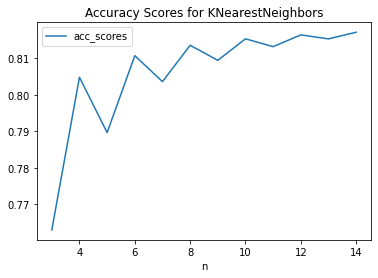

In [77]:
flight_data_clean = pd.read_csv('participants_dataset_DES.csv')
flight_data_clean = identify_missing_data(flight_data_clean)
flight_data_clean = process_req_data(flight_data_clean)
apply_model(flight_data_clean, 'logistic')
apply_model(flight_data_clean, 'nearest_neighbors')
flight_data_final.drop(['DEP_DEL15'], axis=1).to_csv('Submission_MachineHack_DES_Sajan_Ravindran.csv', index=False)